**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "matrix*tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec_txt_fpath = Sys.glob(txt_fglob)
vec_txt_fname = basename(vec_txt_fpath)

vec = vec_txt_fname
print(vec)

 [1] "matrix.annotation.chipseq_flagship.tsv"                 
 [2] "matrix.annotation.chipseq_full.tsv"                     
 [3] "matrix.annotation.chipseq_histone.tsv"                  
 [4] "matrix.annotation.chipseq_subset.tsv"                   
 [5] "matrix.annotation.fcc_peak_call.tsv"                    
 [6] "matrix.annotation.genome_tss.tsv"                       
 [7] "matrix.annotation.merge.chipseq_full.fcc.tss.tsv"       
 [8] "matrix.annotation.prepare.cre.chipseq_full.fcc.tss.tsv" 
 [9] "matrix.annotation.prepare.cre.chipseq_full.fcc.tsv"     
[10] "matrix.annotation.prepare.cre.chipseq_full.only.tsv"    
[11] "matrix.annotation.prepare.enh.chipseq_full.fcc.tss.tsv" 
[12] "matrix.annotation.prepare.enh.chipseq_full.fcc.tsv"     
[13] "matrix.annotation.prepare.enh.chipseq_full.only.tsv"    
[14] "matrix.annotation.prepare.full.chipseq_full.fcc.tss.tsv"
[15] "matrix.annotation.prepare.full.chipseq_full.fcc.tsv"    
[16] "matrix.annotation.prepare.full.chipseq_full.only.

In [7]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "matrix.annotation.fcc_peak_call.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_fcc = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 115953     14


Chrom,ChromStart,ChromEnd,Region,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif
chr1,10038,10405,chr1:10038-10405,0,0,0,0,1,0,0,0,0,0
chr1,16025,16338,chr1:16025-16338,0,0,0,0,1,0,0,0,0,0
chr1,17288,17689,chr1:17288-17689,0,0,0,0,1,0,0,0,0,0
chr1,28934,29499,chr1:28934-29499,0,0,0,0,1,0,0,0,0,0
chr1,115429,115969,chr1:115429-115969,1,0,0,0,0,0,0,0,0,0
chr1,136201,137353,chr1:136201-137353,0,0,0,0,1,0,0,0,0,0


In [35]:
txt_fdiry = file.path(
    FD_RES, 
    "region_nuc", 
    "fcc_astarr_macs"
)
txt_fname = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat = dat %>% dplyr::select(
    `#1_usercol`,
    `2_usercol`,
    `3_usercol`,
    `5_pct_gc`,
    `12_seq_len`
)
colnames(dat) = c("Chrom", "ChromStart", "ChromEnd", "pGC", "Length")

dat_region_gc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150042      5


Chrom,ChromStart,ChromEnd,pGC,Length
chr1,10038,10405,0.523161,367
chr1,14282,14614,0.578313,332
chr1,16025,16338,0.587859,313


In [67]:
tmp = dat_region_gc
tmp = tmp  %>% 
    dplyr::mutate(High_GC = as.integer(pGC > 0.60)) %>%
    dplyr::select(Chrom, ChromStart, ChromEnd, High_GC)

dat = dat_region_annot_fcc
dat = dat %>% dplyr::left_join(tmp, by = c("Chrom", "ChromStart", "ChromEnd"))

dat_region_annot_fcc_pgc = dat
head(dat)

Chrom,ChromStart,ChromEnd,Region,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif,High_GC
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr1,10038,10405,chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,0
chr1,16025,16338,chr1:16025-16338,0,0,0,0,1,0,0,0,0,0,0
chr1,17288,17689,chr1:17288-17689,0,0,0,0,1,0,0,0,0,0,1
chr1,28934,29499,chr1:28934-29499,0,0,0,0,1,0,0,0,0,0,1
chr1,115429,115969,chr1:115429-115969,1,0,0,0,0,0,0,0,0,0,0
chr1,136201,137353,chr1:136201-137353,0,0,0,0,1,0,0,0,0,0,1


In [72]:
dat = dat_region_annot_fcc_pgc

vec_high_gc = dat$High_GC

tmp = dat %>% dplyr::select(ends_with("_A"), ends_with("_R"))
lst = lapply(tmp, function(vec_peak){
    res = table(vec_high_gc, vec_peak)
    return(res)
})

In [74]:
res = lst[[1]]
res

           vec_peak
vec_high_gc     0     1
          0 66924 21855
          1 22868  4306

In [75]:
as.data.frame(res)

vec_high_gc,vec_peak,Freq
<fct>,<fct>,<int>
0,0,66924
1,0,22868
0,1,21855
1,1,4306


In [52]:
dat = dat_region_annot_fcc_pgc
dat = dat %>%
    tidyr::gather(Label, Value, -Chrom, -ChromStart, -ChromEnd, -Region) %>%
    dplyr::filter(Value > 0) %>%
    dplyr::distinct()

lst = split(dat$Region, dat$Label)

In [54]:
library(UpSetR)

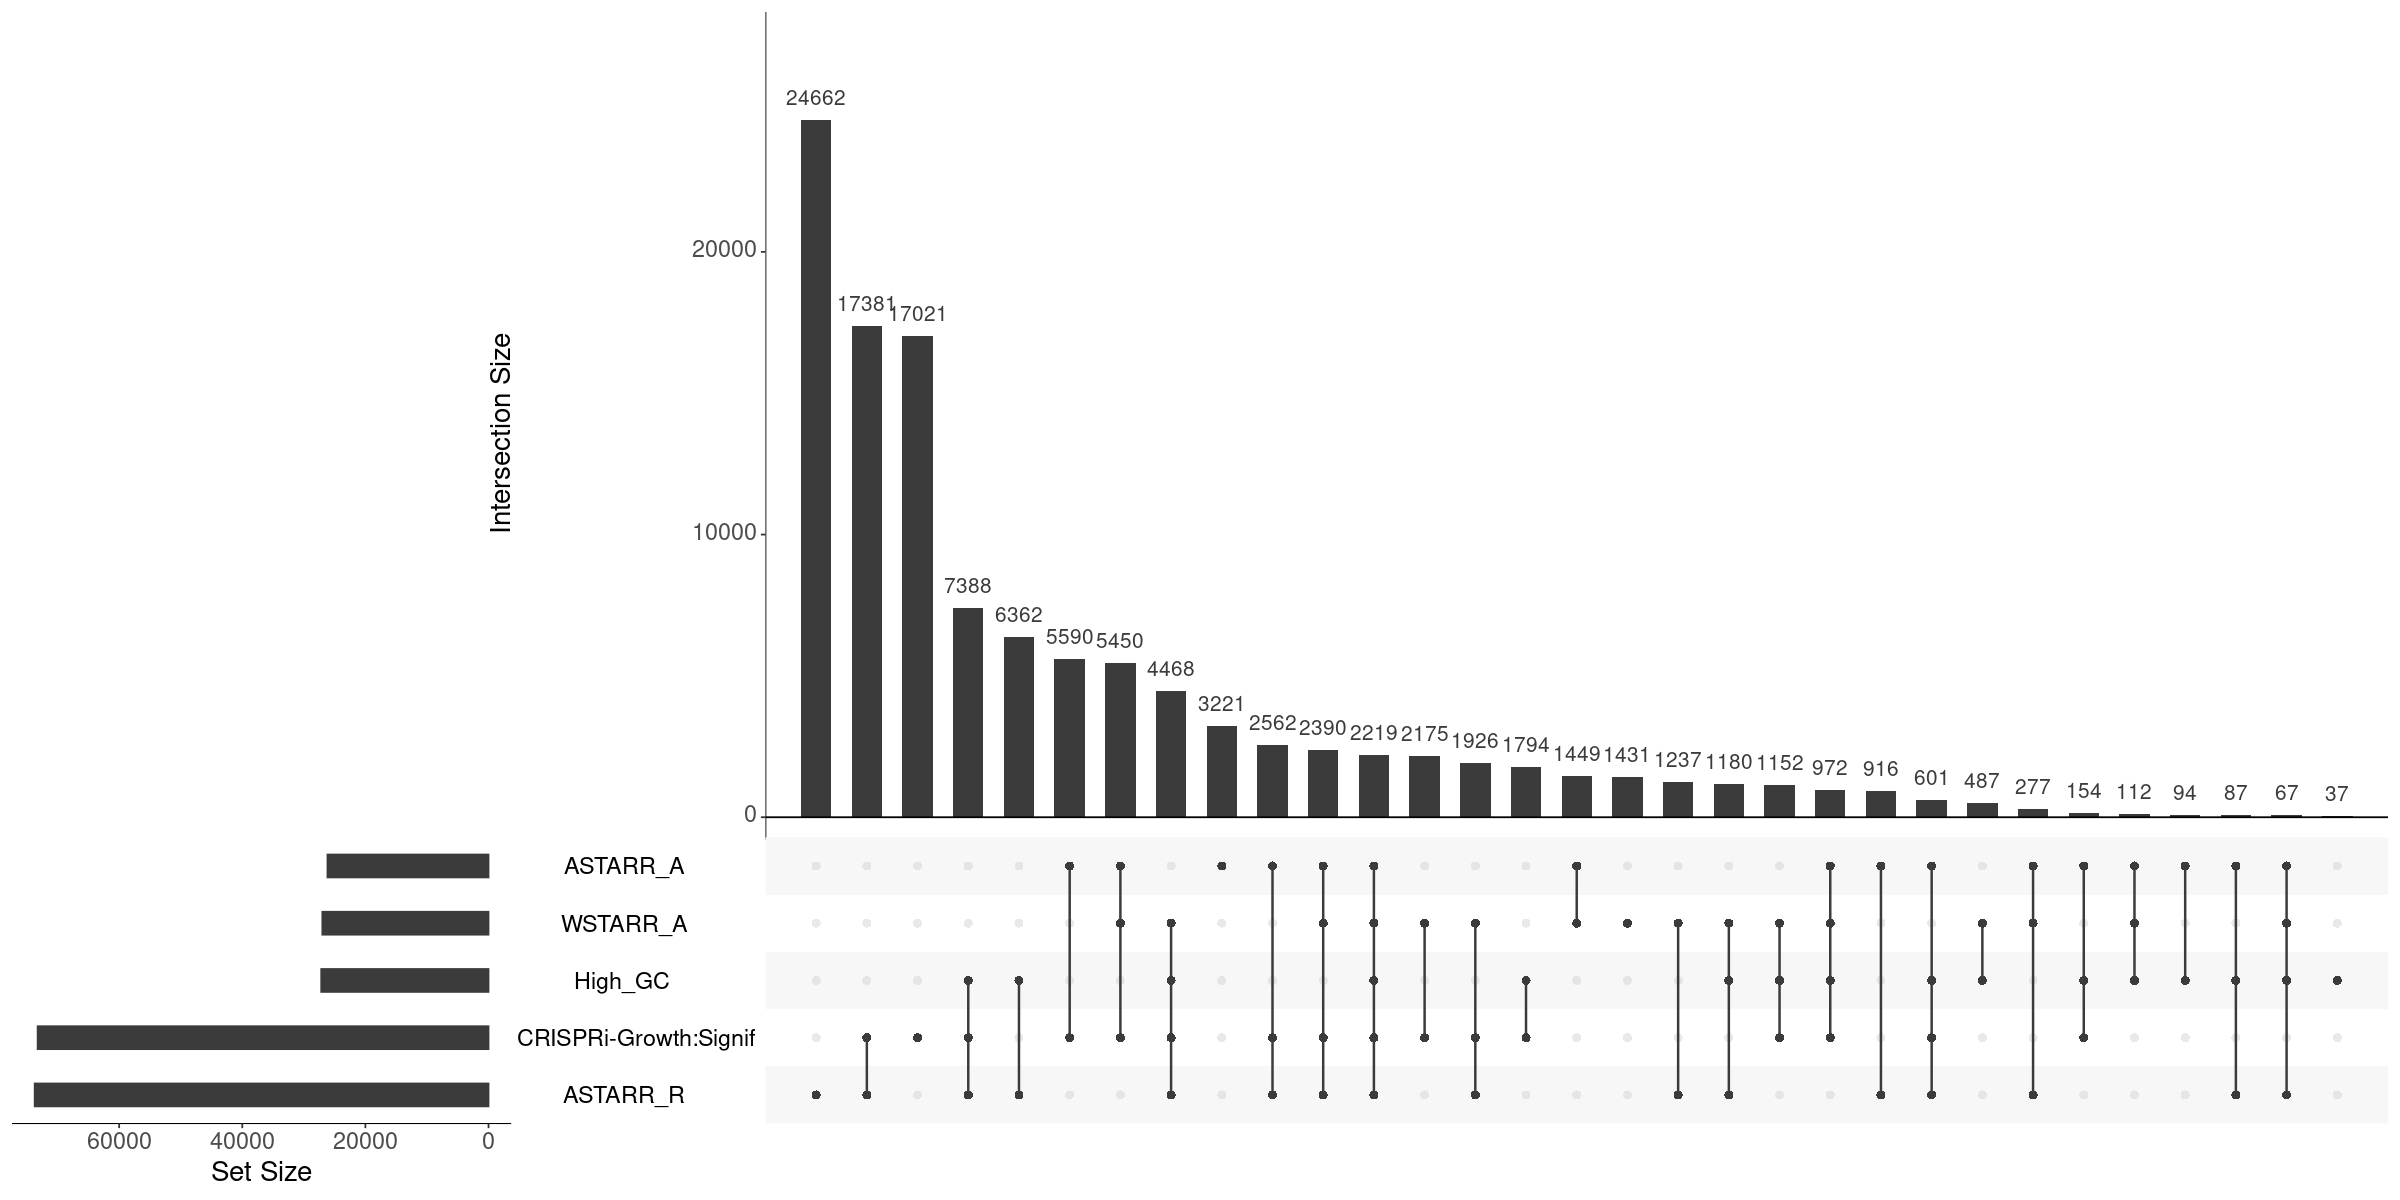

In [66]:
options(repr.plot.height=10, repr.plot.width=20)
upset(
    fromList(lst), 
    order.by = "freq",
    nintersects = NA,
    text.scale = c(
        2, # upper barplot y axis title
        2, # upper barplot y axis text
        2, # left  barplot y axis title
        2, # left  barplot y axis text
        2, # set title
        2  # upper barplot count number
    )
)

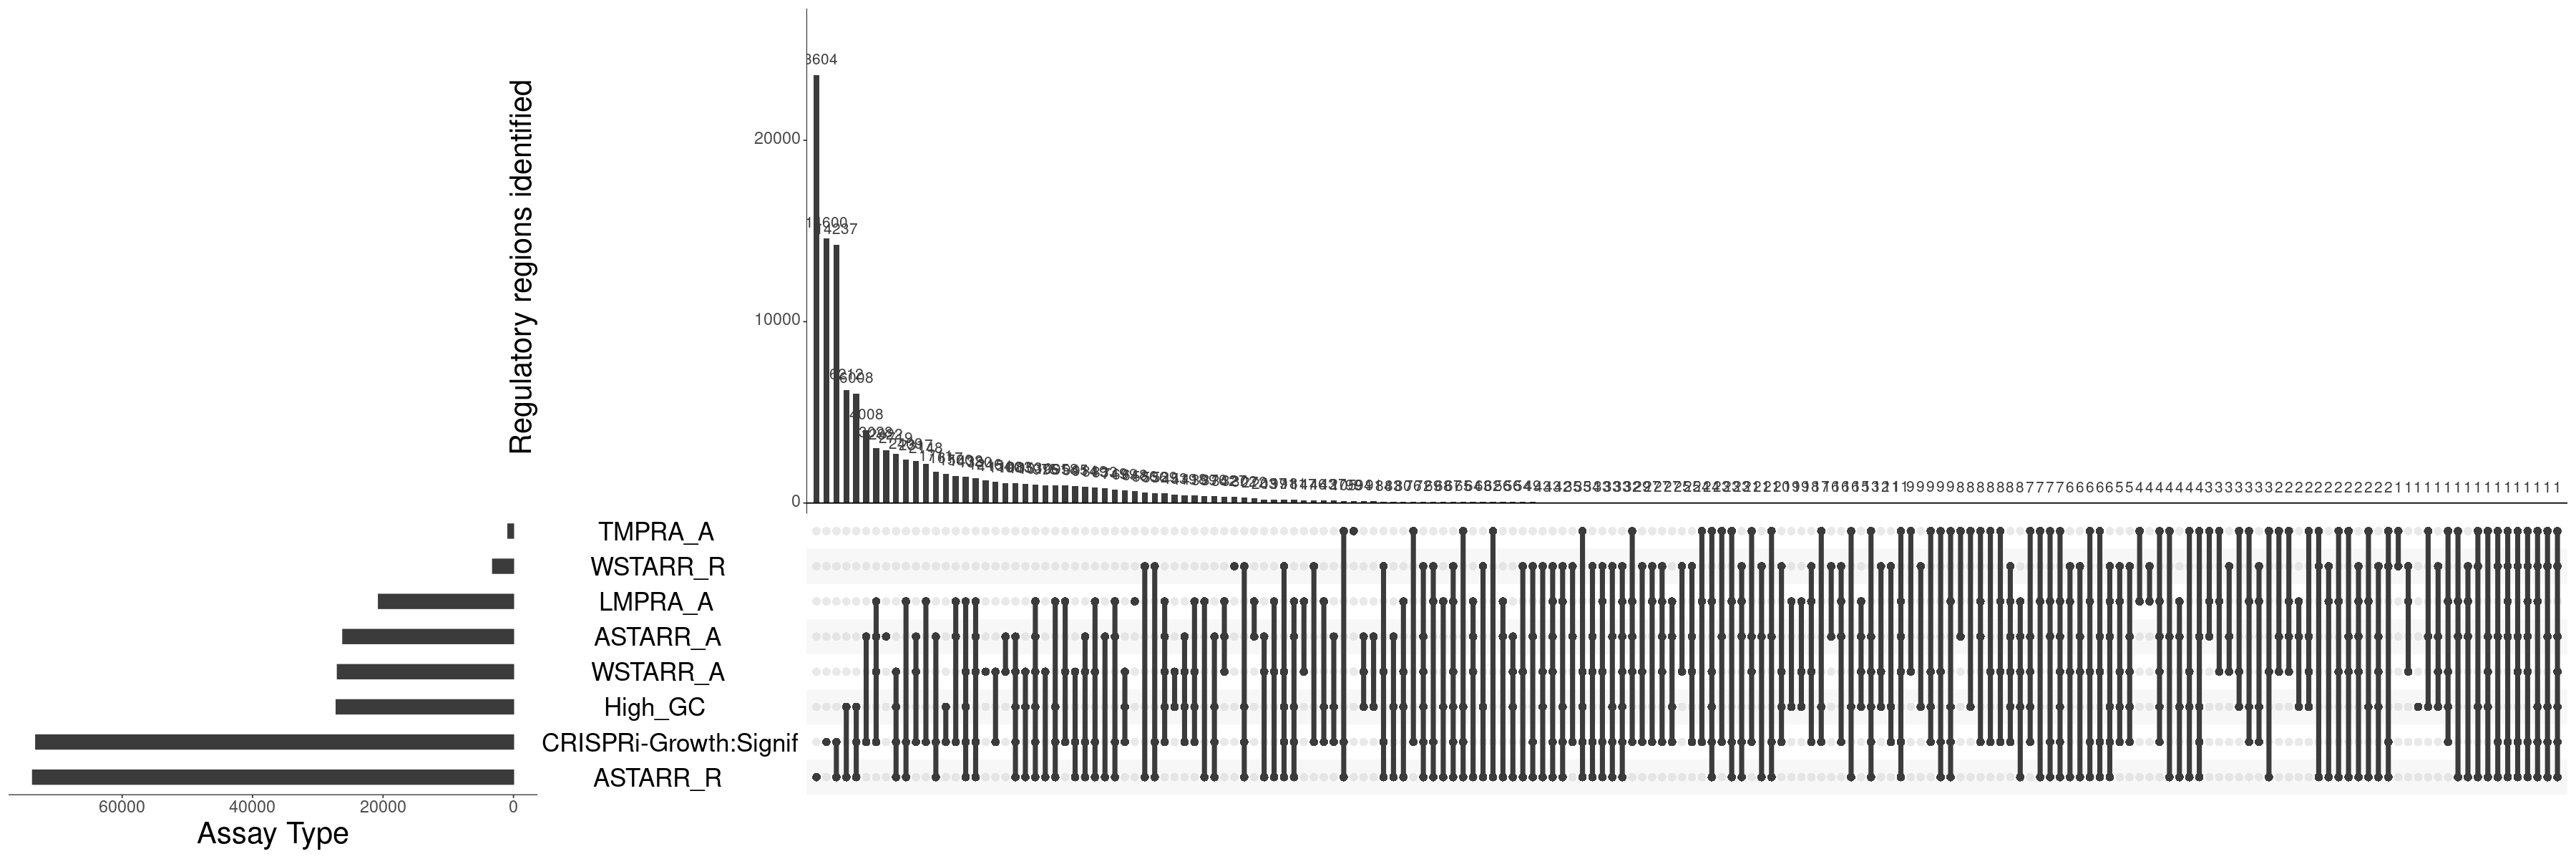

In [55]:
options(repr.plot.height=10, repr.plot.width=30)
upset(fromList(lst), 
      order.by = "freq", 
      nsets = 8,
      nintersects = NA,
      number.angles = 0,
      point.size = 3, 
      line.size  = 2,
      mb.ratio = c(0.6, 0.4),
      mainbar.y.label = "Regulatory regions identified", 
      sets.x.label    = "Assay Type", 
      text.scale = c(
          3, # upper barplot y axis title
          2, # upper barplot y axis text
          3, # left  barplot y axis title
          2, # left  barplot y axis text
          3, # set title
          2  # upper barplot count number
      )
)

In [11]:
dat = dat_region_annot_fcc
dat = dat %>% dplyr::select(Region, ends_with("_A"))
head(dat)

Region,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,0,0,0,0
chr1:16025-16338,0,0,0,0
chr1:17288-17689,0,0,0,0
chr1:28934-29499,0,0,0,0
chr1:115429-115969,1,0,0,0
chr1:136201-137353,0,0,0,0


In [12]:
dat = dat_region_annot_fcc
dat = dat %>% dplyr::select(Region, ends_with("_R"))
head(dat)

Region,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,1,0,0,0
chr1:16025-16338,1,0,0,0
chr1:17288-17689,1,0,0,0
chr1:28934-29499,1,0,0,0
chr1:115429-115969,0,0,0,0
chr1:136201-137353,1,0,0,0


In [31]:
dat = dat_region_annot_fcc
dat = dat %>% 
    dplyr::select(Region, ends_with("_A")) %>% 
    tibble::column_to_rownames(var="Region")

vec = apply(dat, 1, sum)
idx = (vec > 1)
vec = names(vec[idx])

vec_txt_fcc_enh = vec
cat(sum(idx), "/", length(idx), "\n")
head(vec)

20283 / 115953 


[1] "chr1:778233-779389"   "chr1:842516-843431"   "chr1:912735-913419"  
[4] "chr1:958722-959968"   "chr1:960468-961615"   "chr1:1005094-1005553"

In [32]:
dat = dat_region_annot_fcc
dat = dat %>% 
    dplyr::select(Region, ends_with("_R")) %>% 
    tibble::column_to_rownames(var="Region")

vec = apply(dat, 1, sum)
idx = (vec > 1)
vec = names(vec[idx])

vec_txt_fcc_rep = vec
cat(sum(idx), "/", length(idx), "\n")
head(vec)

2619 / 115953 


[1] "chr1:975975-976656"   "chr1:1019190-1021734" "chr1:1079414-1080664"
[4] "chr1:1889925-1892005" "chr1:2314353-2315666" "chr1:2381232-2382958"

In [33]:
vec_txt_fcc = c(vec_txt_fcc_enh, vec_txt_fcc_rep)

dat = dat_region_annot_fcc
num = nrow(dat)
dat = dat %>% dplyr::filter(Region %in% vec_txt_fcc)

cat(nrow(dat), "/", num, "\n")

22517 / 115953 


In [34]:
head(dat)

Chrom,ChromStart,ChromEnd,Region,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,778233,779389,chr1:778233-779389,1,1,1,0,0,0,0,0,0,1
chr1,842516,843431,chr1:842516-843431,1,0,1,0,1,0,0,0,0,1
chr1,912735,913419,chr1:912735-913419,1,1,0,0,1,0,0,0,0,1
chr1,958722,959968,chr1:958722-959968,0,1,1,0,1,0,0,0,0,1
chr1,960468,961615,chr1:960468-961615,0,1,1,0,1,0,0,0,0,1
chr1,975975,976656,chr1:975975-976656,0,1,0,0,1,1,0,0,0,1


In [16]:
dat = dat_region_annot_fcc
dat = head(dat)
dat = dat %>% tibble::column_to_rownames(var="Region")
dat

,Chrom,ChromStart,ChromEnd,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,chr1,10038,10405,0,0,0,0,1,0,0,0,0,0
chr1:16025-16338,chr1,16025,16338,0,0,0,0,1,0,0,0,0,0
chr1:17288-17689,chr1,17288,17689,0,0,0,0,1,0,0,0,0,0
chr1:28934-29499,chr1,28934,29499,0,0,0,0,1,0,0,0,0,0
chr1:115429-115969,chr1,115429,115969,1,0,0,0,0,0,0,0,0,0
chr1:136201-137353,chr1,136201,137353,0,0,0,0,1,0,0,0,0,0


In [17]:
dat %>% tibble::rownames_to_column(var = "Region")

Region,Chrom,ChromStart,ChromEnd,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,chr1,10038,10405,0,0,0,0,1,0,0,0,0,0
chr1:16025-16338,chr1,16025,16338,0,0,0,0,1,0,0,0,0,0
chr1:17288-17689,chr1,17288,17689,0,0,0,0,1,0,0,0,0,0
chr1:28934-29499,chr1,28934,29499,0,0,0,0,1,0,0,0,0,0
chr1:115429-115969,chr1,115429,115969,1,0,0,0,0,0,0,0,0,0
chr1:136201-137353,chr1,136201,137353,0,0,0,0,1,0,0,0,0,0
